<a href="https://colab.research.google.com/github/autheblanc/skills-introduction-to-github/blob/create-my-first-branch/xinyi_s_milk_reward_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.read_csv("Rig2.csv")

,rig_name,2
0,pump_type,camden
1,date,161224
2,pushes_per_weighing,5
3,duration (ms),weight(g)
4,100,0.076
5,100,0.0775
6,200,0.1535
7,200,0.1425
8,300,0.2396
9,300,0.2301


In [ ]:
pd.read_csv("Rig3.csv")

,rig_name,3
0,pump_type,camden
1,date,161224
2,pushes_per_weighing,5
3,duration (ms),weight(g)
4,100,0.047
5,100,0.0437
6,100,0.0673
7,200,0.0849
8,300,0.0948
9,300,0.0996


In [ ]:
pd.read_csv("Rig4.csv")

,rig_name,4
0,pump_type,camden
1,date,161224
2,pushes_per_weighing,5
3,duration (ms),weight(g)
4,100,0.047
5,100,0.0437
6,100,0.0673
7,200,0.0849
8,300,0.0948
9,300,0.0996


In [ ]:
pd.read_csv("Rig5.csv")

,rig_name,5
0,pump_type,camden
1,date,161224
2,pushes_per_weighing,5
3,duration (ms),weight(g)
4,100,0.0268
5,100,0.0358
6,200,0.0463
7,200,0.0441
8,300,0.0775
9,300,0.0688


In [ ]:
pd.read_csv("Rig6.csv")

,rig_name,6
0,pump_type,camden
1,date,161224
2,pushes_per_weighing,5
3,duration (ms),weight(g)
4,100,0.0463
5,100,0.0635
6,200,0.0916
7,200,0.0931
8,300,0.1272
9,300,0.1303


In [ ]:
pd.read_csv("Rig7.csv")

,rig_name,7
0,pump_type,camden
1,date,161224
2,pushes_per_weighing,5
3,duration (ms),weight(g)
4,100,0.0715
5,100,0.0808
6,200,0.1659
7,200,0.1695
8,300,0.253
9,300,0.2517


In [ ]:
import pandas as pd
import numpy as np
rig_2=np.array(pd.read_csv("Rig2.csv"))
rig_3=np.array(pd.read_csv("Rig3.csv"))
rig_4=np.array(pd.read_csv("Rig4.csv"))
rig_5=np.array(pd.read_csv("Rig5.csv"))
rig_6=np.array(pd.read_csv("Rig6.csv"))
rig_7=np.array(pd.read_csv("Rig7.csv"))

In [ ]:
rig_2_row=rig_2[4:11,0].astype(int)
rig_3_row=rig_3[4:11,0].astype(int)
rig_4_row=rig_4[4:11,0].astype(int)
rig_5_row=rig_5[4:11,0].astype(int)
rig_6_row=rig_6[4:11,0].astype(int)
rig_7_row=rig_7[4:11,0].astype(int)

rig_3_column = rig_3[4:11, 1].astype(float)/5 *1000
rig_4_column = rig_4[4:11, 1].astype(float)/5 *1000
rig_5_column = rig_5[4:11, 1].astype(float)/5 *1000
rig_6_column = rig_6[4:11, 1].astype(float)/5 *1000
rig_7_column = rig_7[4:11, 1].astype(float)/5 *1000
rig_2_column = rig_2[4:11, 1].astype(float)/5 *1000

Rig_2=np.stack((rig_2_row,rig_2_column),axis=1)
Rig_3=np.stack((rig_3_row,rig_3_column),axis=1)
Rig_4=np.stack((rig_4_row,rig_4_column),axis=1)
Rig_5=np.stack((rig_5_row,rig_5_column),axis=1)
Rig_6=np.stack((rig_6_row,rig_6_column),axis=1)
Rig_7=np.stack((rig_7_row,rig_7_column),axis=1)




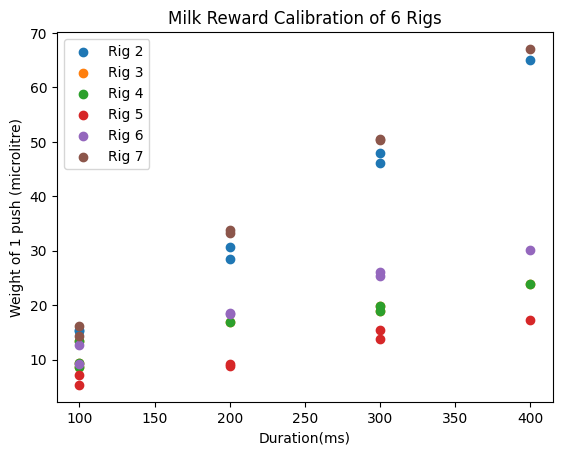

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Example data

# Plot each group with a unique style
plt.scatter(rig_2_row, rig_2_column, label="Rig 2")
plt.scatter(rig_3_row, rig_3_column, label="Rig 3")
plt.scatter(rig_4_row, rig_4_column, label="Rig 4")
plt.scatter(rig_5_row, rig_5_column, label="Rig 5")
plt.scatter(rig_6_row, rig_6_column, label="Rig 6")
plt.scatter(rig_7_row, rig_7_column, label="Rig 7")

# Add labels and legend
plt.xlabel('Duration(ms)')
plt.ylabel('Weight of 1 push (microlitre)')
plt.title('Milk Reward Calibration of 6 Rigs')
plt.legend()

# Show the plot
plt.show()



In [ ]:
Rigs=[Rig_2,Rig_3,Rig_4,Rig_5,Rig_6,Rig_7]

In [ ]:
import statsmodels.api as sm
import numpy as np

for Rig_i in Rigs:
  mi = sm.OLS.from_formula('y ~ x -1', data= Rig_i)
  results = mi.fit()
  print(results.summary())

In [ ]:
x=np.arange(0,450)

In [ ]:
weight_pred_2= 0.1573 * x


In [ ]:
weight_pred_3=0.1522* x


In [ ]:
weight_pred_4=0.068*x

In [ ]:
weight_pred_5=0.0481* x



In [ ]:
weight_pred_6=0.0836* x


In [ ]:
weight_pred_7=0.1687* x


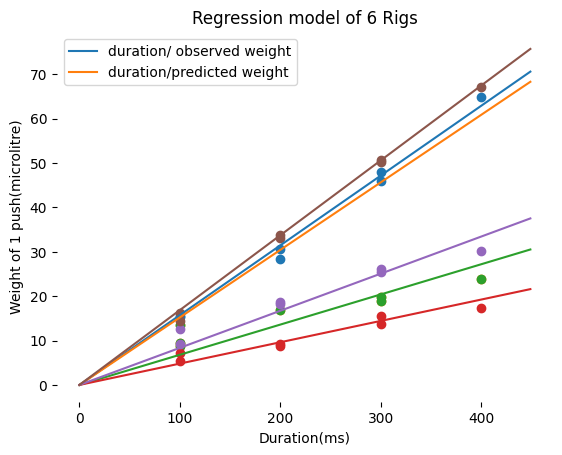

In [ ]:
weight_pred= (weight_pred_2,weight_pred_3 ,weight_pred_4, weight_pred_5,weight_pred_6,weight_pred_7)

for weight_pred_i in weight_pred:
  plt.plot( x, weight_pred_i)

for Rig_i in Rigs:
  plt.scatter(Rig_i[:,0],Rig_i[:,1])

plt.title('Regression model of 6 Rigs')
plt.xlabel('Duration(ms)')
plt.ylabel('Weight of 1 push(microlitre)')
plt.legend(['duration/ observed weight', 'duration/predicted weight'], loc='best', facecolor='white')
plt.box(False)
plt.show()